Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15562 entries, 0 to 15561
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Latitude    15562 non-null  float64
 1   Longitude   15562 non-null  float64
 2   Smin        15562 non-null  float64
 3   Az          15562 non-null  float64
 4   Depth       15562 non-null  float64
 5   ErrDepth    15562 non-null  float64
 6   Nsta        15562 non-null  float64
 7   Gap         15562 non-null  float64
 8   Magnitud    15562 non-null  float64
 9   pca_retemp  15562 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB
None

Resumen estadístico de las variables numéricas:
           Latitude     Longitude          Smin            Az         Depth  \
count  15562.000000  15562.000000  15562.000000  15562.000000  15562.000000   
mean      28.597772    -17.837592      6.463739     92.517993     13.911579   
std        0.072274      0.04231

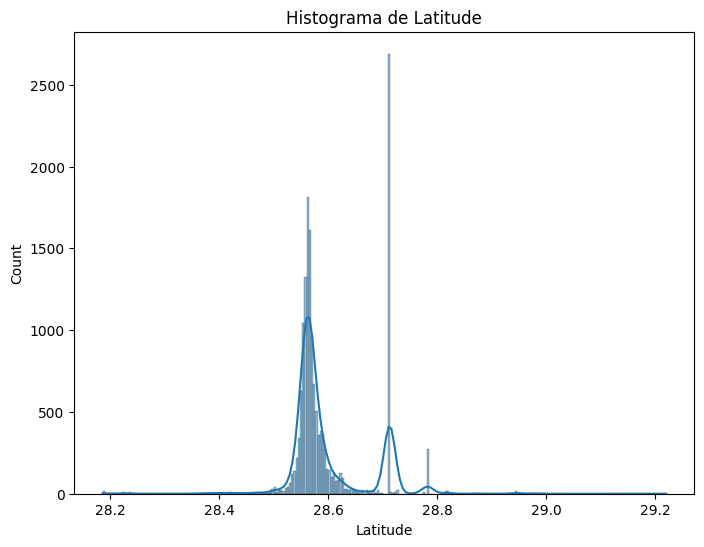

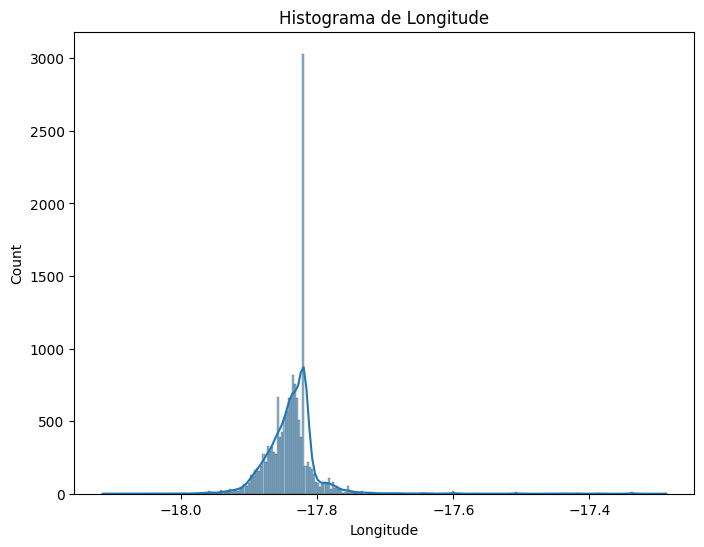

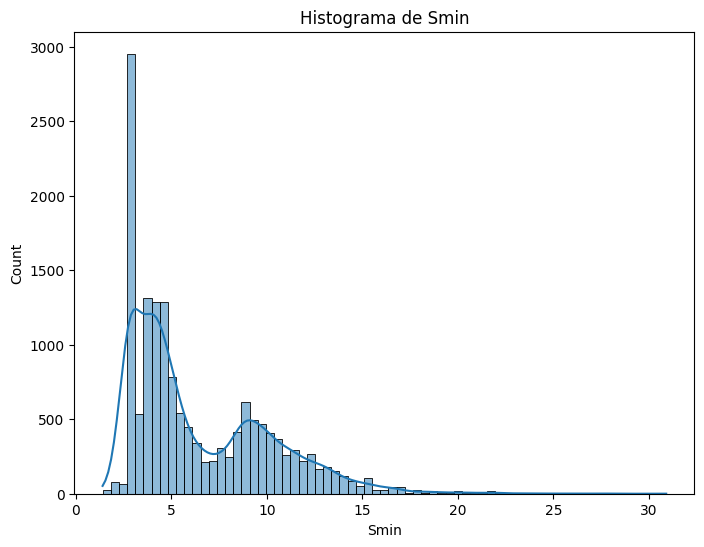

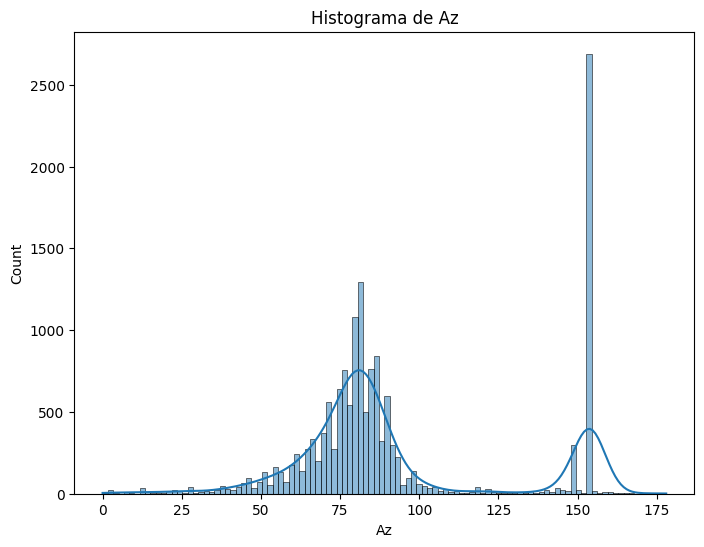

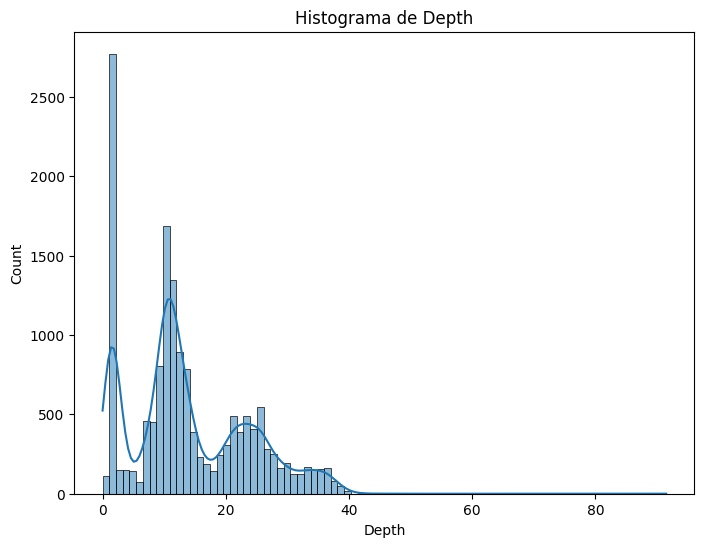

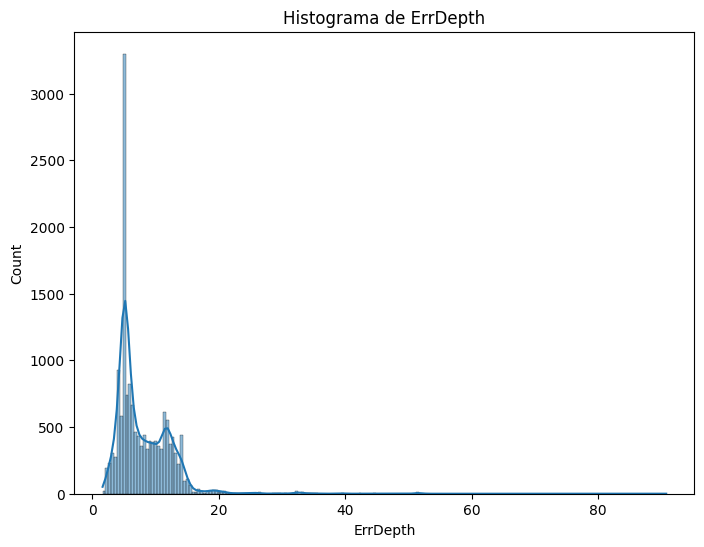

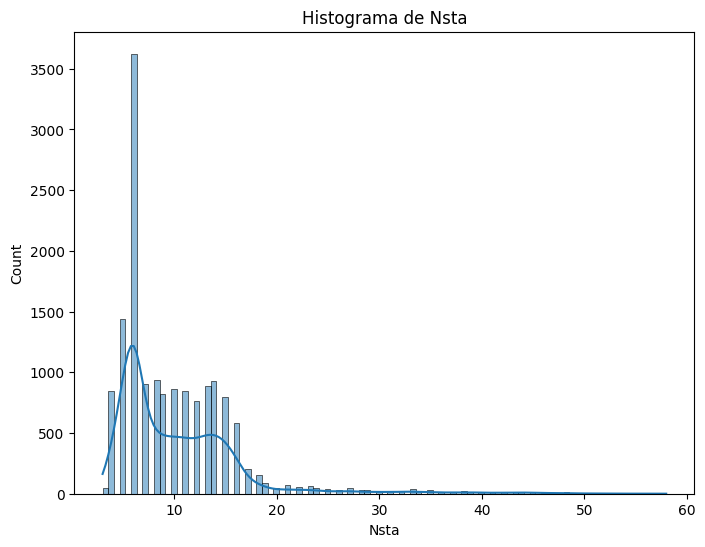

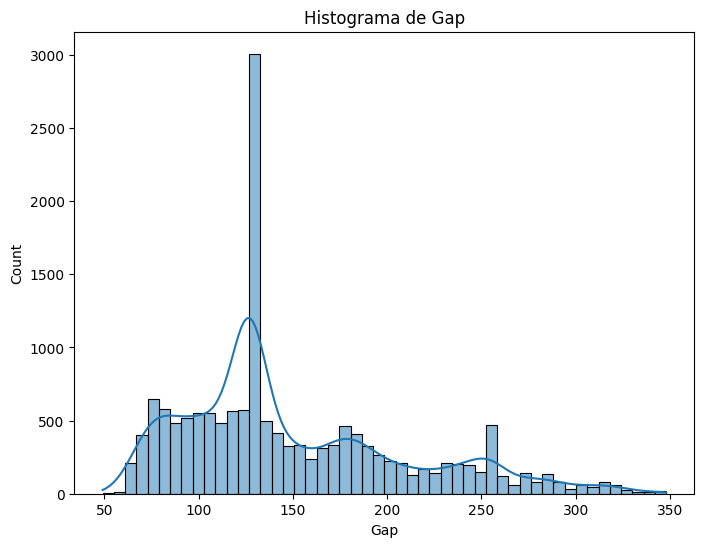

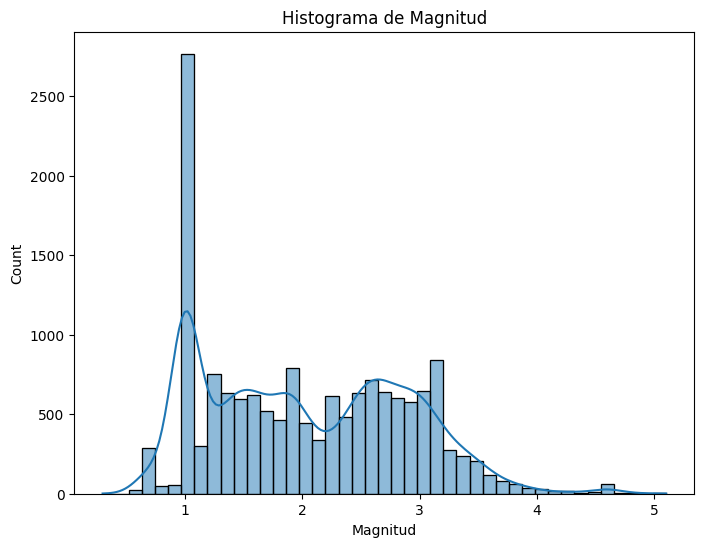

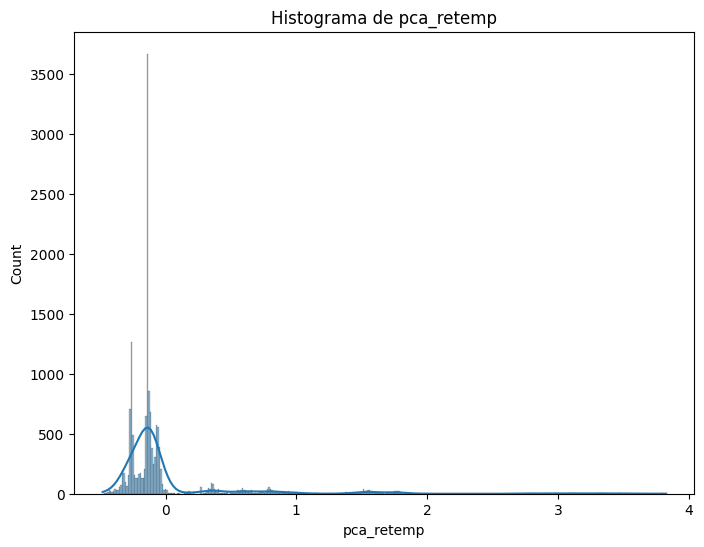

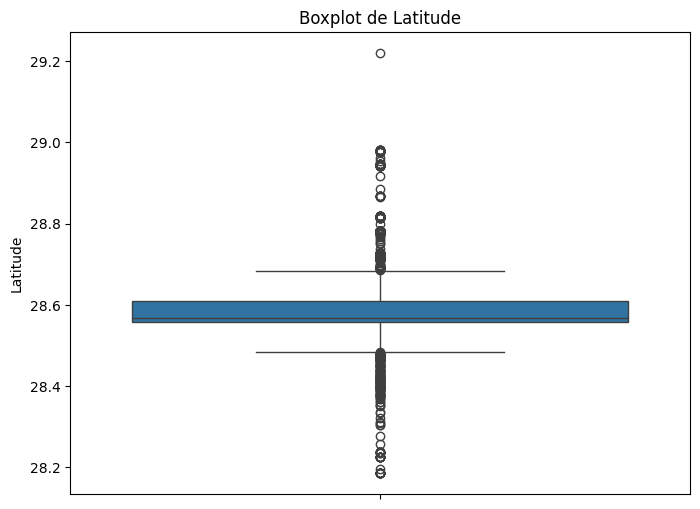

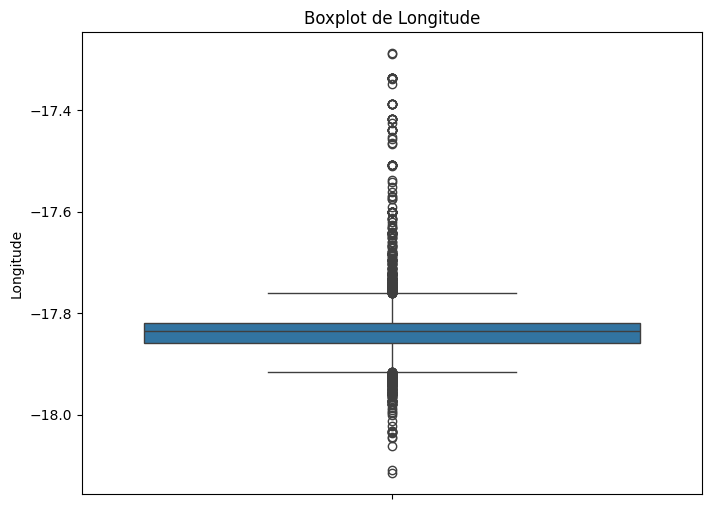

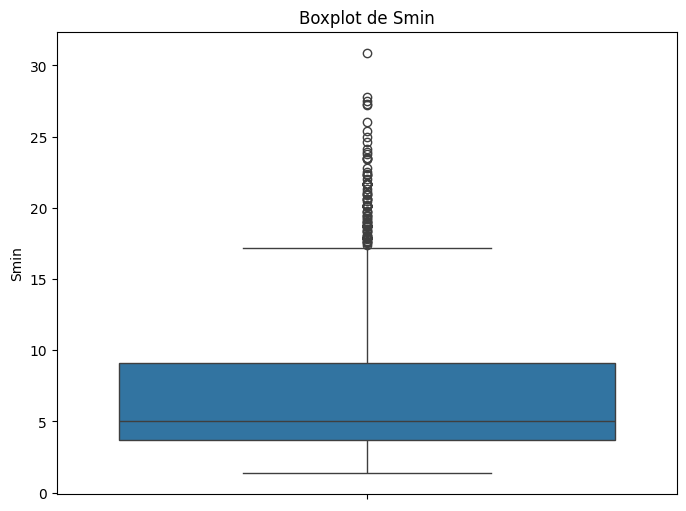

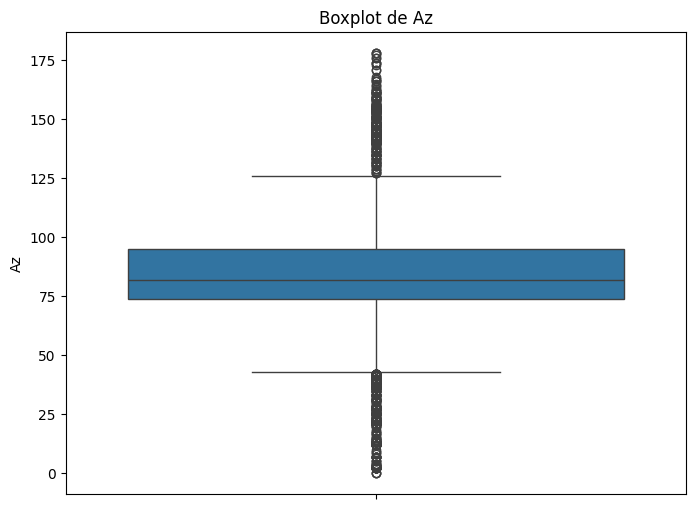

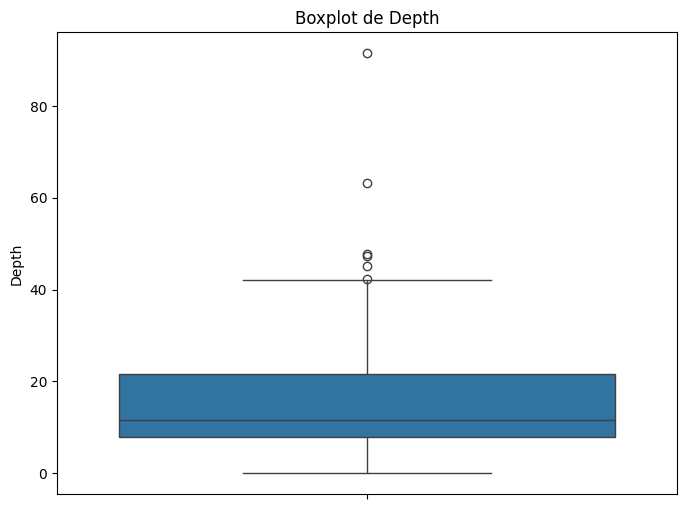

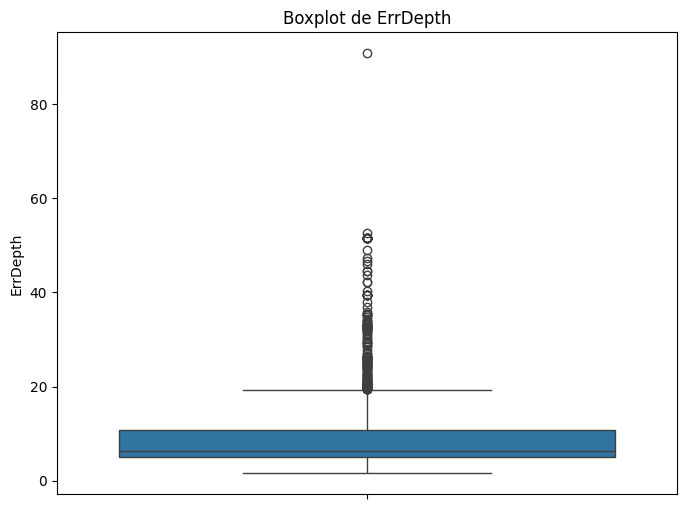

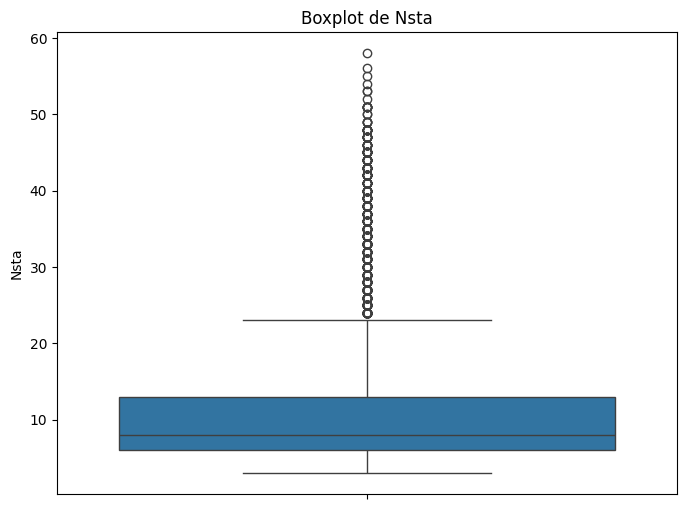

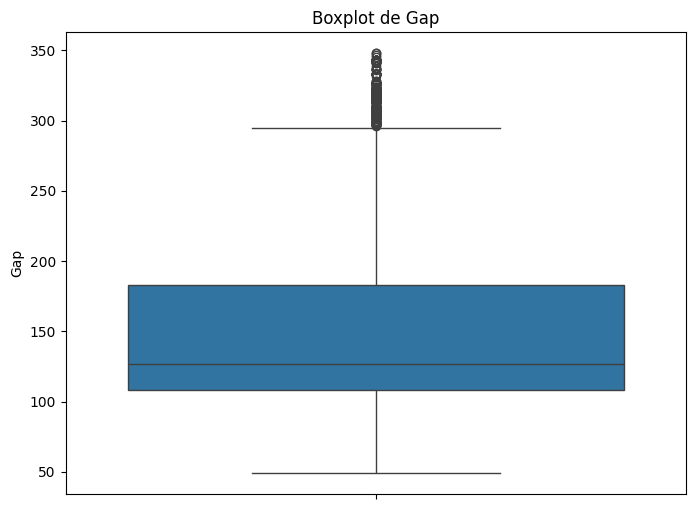

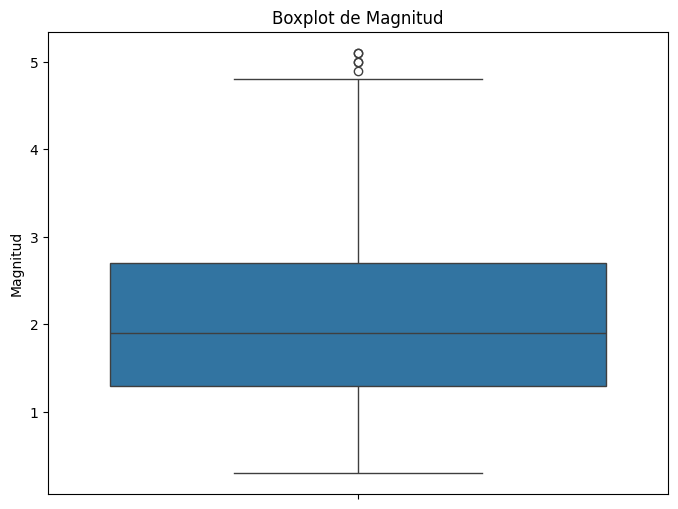

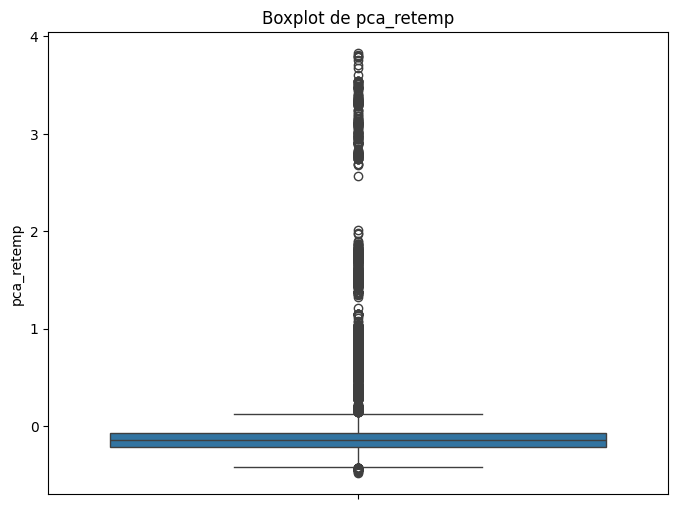


Matriz de correlación:


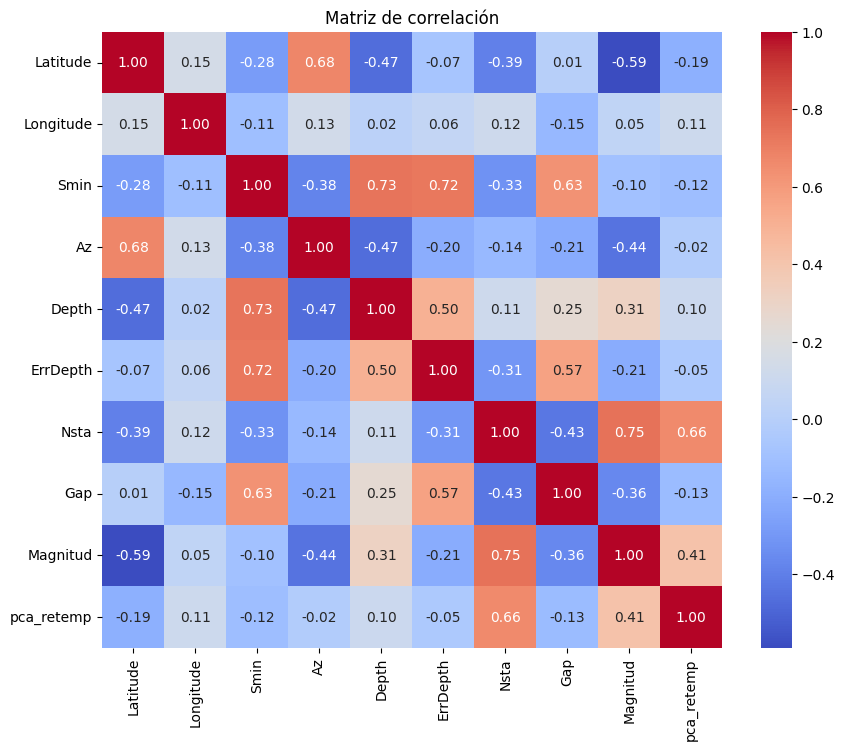

,Latitude,Longitude,Smin,Az,Depth,ErrDepth,Nsta,Gap,Magnitud,pca_retemp
Latitude,1.000000,0.145250,-0.283588,0.676339,-0.467162,-0.074598,-0.392264,0.005662,-0.590548,-0.186835
Longitude,0.145250,1.000000,-0.108811,0.134751,0.021400,0.056517,0.117685,-0.149383,0.045353,0.111403
Smin,-0.283588,-0.108811,1.000000,-0.381506,0.734528,0.724998,-0.327916,0.633397,-0.099229,-0.116677
Az,0.676339,0.134751,-0.381506,1.000000,-0.471126,-0.201956,-0.142370,-0.214403,-0.443147,-0.023694
Depth,-0.467162,0.021400,0.734528,-0.471126,1.000000,0.502214,0.113515,0.254239,0.310870,0.101274
ErrDepth,-0.074598,0.056517,0.724998,-0.201956,0.502214,1.000000,-0.309058,0.569138,-0.211198,-0.048211
Nsta,-0.392264,0.117685,-0.327916,-0.142370,0.113515,-0.309058,1.000000,-0.431357,0.745178,0.661275
Gap,0.005662,-0.149383,0.633397,-0.214403,0.254239,0.569138,-0.431357,1.000000,-0.361787,-0.125407
Magnitud,-0.590548,0.045353,-0.099229,-0.443147,0.310870,-0.211198,0.745178,-0.361787,1.000000,0.410664
pca_retemp,-0.186835,0.111403,-0.116677,-0.023694,0.101274,-0.048211,0.661275,-0.125407,0.410664,1.000000


In [ ]:
# prompt: Análisis descriptivo completo con el conjunto de datos Datos_Resultantes.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el conjunto de datos
try:
    df = pd.read_csv('Datos_Resultantes.csv')
except FileNotFoundError:
    print("Error: El archivo 'Datos_Resultantes.csv' no se encontró. Asegúrate de que el archivo exista y esté en la misma carpeta que el script.")
    exit()

# Información general del DataFrame
print("Información general del DataFrame:")
print(df.info())

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(df.describe())

# Análisis de valores faltantes
print("\nAnálisis de valores faltantes:")
print(df.isnull().sum())

# Histograma para cada variable numérica
for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

# Boxplots para identificar outliers en las variables numéricas
for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Análisis de variables categóricas (si existen)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
  print("\nAnálisis de variables categóricas:")
  for col in categorical_cols:
      print(f"\nFrecuencia de valores para la variable {col}:")
      print(df[col].value_counts())
      plt.figure(figsize=(8, 6))
      sns.countplot(x=df[col])
      plt.title(f'Conteo de valores para {col}')
      plt.xticks(rotation=45, ha='right')
      plt.show()

# Matriz de correlación para variables numéricas (si hay más de una)
numeric_cols = df.select_dtypes(include=np.number).columns
if len(numeric_cols) > 1:
    print("\nMatriz de correlación:")
    correlation_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de correlación')
    plt.show()
correlation_matrix


# Puedes agregar más análisis según las características de tu conjunto de datos.
# Por ejemplo:
# - Análisis de la distribución bivariada (scatter plots, jointplots)
# - Análisis de grupos utilizando groupby
# - Análisis de series de tiempo (si la data incluye fechas)